# 2024 Guide Session 5주차 실습

In [1]:
'''1'''
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_palette('PRGn')
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''2'''
df_train = pd.read_csv('df_train_4.csv')
df_test = pd.read_csv('df_test_4.csv')

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C


## 지난 시간 복습하기

In [3]:
'''3'''
print(df_train.shape) 
print(df_test.shape) 

(891, 11)
(418, 10)


In [4]:
'''4'''
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [5]:
'''5'''
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,24.046813
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,20.481625
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


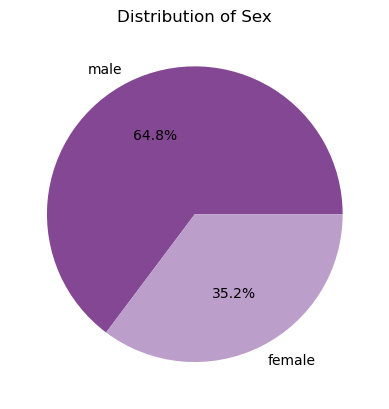

In [6]:
'''6'''
# 1. 성별 분포 시각화
sex_counts = df_train['Sex'].value_counts()
plt.pie(sex_counts, labels= sex_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.show()

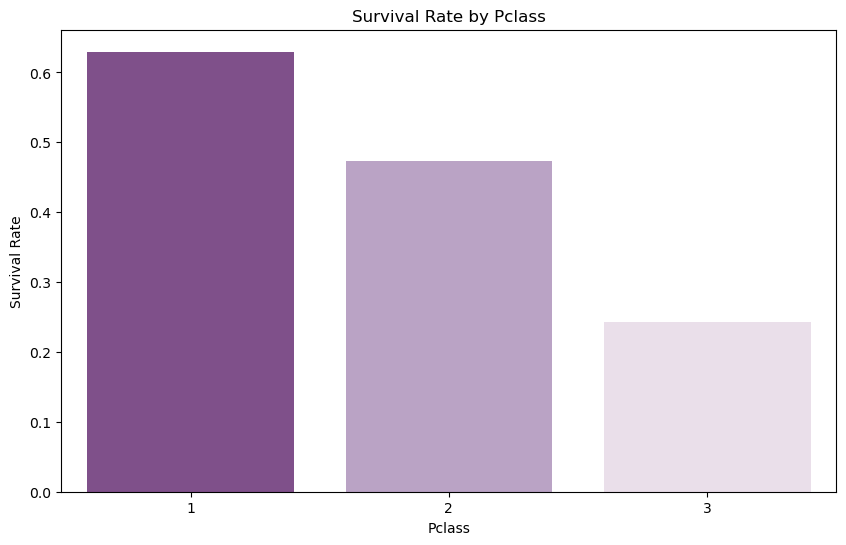

In [7]:
'''7'''
# 2. 객실 등급(Pclass)에 따른 생존율
survival_rate = df_train.groupby('Pclass')['Survived'].mean().reset_index()  
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=survival_rate)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.show()

## EDA 실습 & 퀴즈

<span style = "color:red"> 
Q1. 타이타닉 승객은 30대가 가장 많다. (O or X로 답해주세요.)

In [8]:
### 답 -> ()
# 여기에 발표자를 따라서 코드를 작성하세요.

df_train_copy = df_train.copy()
Age_cat = (df_train['Age']// 10) * 10
df_train_copy.insert(6, 'Age_cat', Age_cat)


In [9]:
sns.displot(df_train_copy[Age_cat])

KeyError: "None of [Int64Index([20, 30, 20, 30, 30, 20, 50,  0, 20, 10,\n            ...\n            30, 20, 20, 20, 30, 20, 10, 20, 20, 30],\n           dtype='int64', length=891)] are in the [columns]"

<span style = "color:red"> 
Q2. 3등석 객실에 가장 많은 연령대는 무엇인가요? (파이차트를 그려서 알아보세요.)

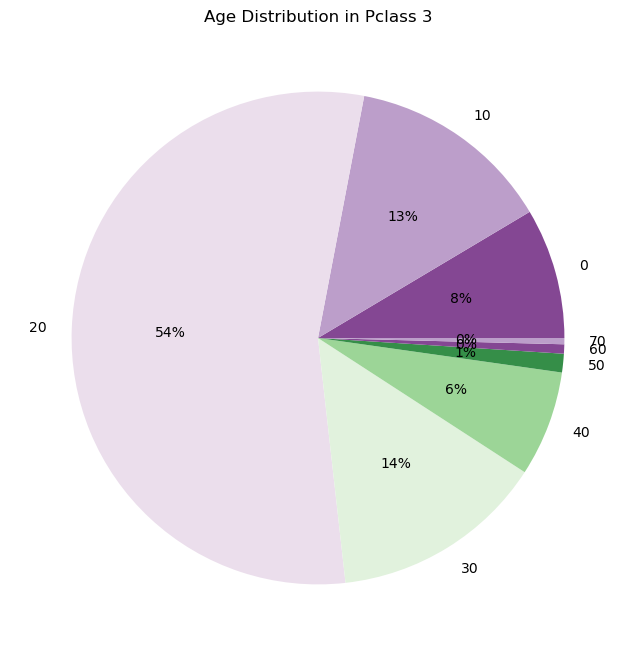

In [10]:
### 답
# 여기에 답을 작성하세요.

# 1. Pclass가 3인 데이터를 df_train_copy에서 뽑아 class_3_data에 저장하세요.
# 2. class_3_data를 위에서 만든 Age_cat 변수 별로 그룹화(groupby)하여 각 연령대에서의 횟수(size())를 구하고, age_class_3_group에 저장하세요.
# 3. age_class_3_group(연령별 횟수)을 전체 횟수의 합으로 나눠서 age_class_3_percentage에 저장하세요.

class_3_data = df_train_copy[df_train_copy['Pclass'] == 3]

#2
age_class_3_group = class_3_data.groupby('Age_cat').size()
#3
age_class_3_percentage = age_class_3_group / age_class_3_group.sum()


# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(age_class_3_percentage, labels=age_class_3_percentage.index, autopct='%d%%')
plt.title('Age Distribution in Pclass 3')
plt.show()

## 문자형 변수 인코딩

#### * Sex, Embarked

In [11]:
'''8'''
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
'''9'''
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
'''10'''
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'])

In [14]:
'''11'''
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,65.6344,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1


## 기본 성능 확인

In [15]:
'''12'''
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,65.6344,1,0,1,0,0


In [16]:
'''13'''
df_test.head(2)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,1,0,0,0,1


In [17]:
'''14'''
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 

In [18]:
'''15'''
X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

In [19]:
'''16'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 10)
(891, 1)
(418, 10)


In [20]:
'''17'''
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1004)

In [21]:
'''18'''
preds = model_dt.predict(X_test)

In [22]:
'''19'''
submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

In [23]:
'''20'''
submission.to_csv('base_score.csv', index=False)

In [24]:
'''21'''
score = pd.read_csv('base_score.csv')
score

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 데이콘 실습
- https://dacon.io/competitions/official/235539/overview/description

## Feature Engineering

### 1. 구간화 (Data Bining)

#### * Age

In [25]:
'''22'''
df_train['Age'].describe()

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
'''23'''
age_bins = [-1, 12, 18, 35, 50, 80]
age_labels = [1, 2, 3, 4, 5]

df_train['Age'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels)
df_test['Age'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels)

#### * Fare

In [27]:
'''24'''
df_train['Fare'].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

In [28]:
'''25'''
fare_bins = [-1, 7.91, 14.45, 31, 66]
fare_labels = [1, 2, 3, 4]

df_train['Fare'] = pd.cut(df_train['Fare'], bins=fare_bins, labels=fare_labels)
df_test['Fare'] = pd.cut(df_test['Fare'], bins=fare_bins, labels=fare_labels)

In [29]:
'''26'''
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",3,1,0,A/5 21171,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",4,1,0,PC 17599,4,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",3,0,0,STON/O2. 3101282,2,1,0,0,0,1


In [30]:
'''27'''
df_test.head(3)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",3,0,0,330911,1,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",4,1,0,363272,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",5,0,0,240276,2,0,1,0,1,0


In [31]:
'''28'''
# 성능 확인
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 

X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

preds = model_dt.predict(X_test)

submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

submission.to_csv('bining_score.csv', index=False)

(891, 10)
(891, 1)
(418, 10)


### 2. 피쳐 생성 (Feature Generation)

#### * Family Size 생성

In [32]:
'''29'''
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [33]:
'''30'''
# 성능 확인
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize'] 

X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

preds = model_dt.predict(X_test)

submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

submission.to_csv('FamilySize_score.csv', index=False)

(891, 11)
(891, 1)
(418, 11)


#### * Ticket Frequency 생성

In [34]:
'''31'''
ticket_counts_train = df_train['Ticket'].value_counts()
ticket_counts_train

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [35]:
'''32'''
ticket_counts_test = df_test['Ticket'].value_counts()
ticket_counts_test

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

In [36]:
'''33'''
ticket_freq_counts = ticket_counts_train.value_counts()

In [37]:
'''34'''
ticket_freq_counts

1    547
2     94
3     21
4     11
7      3
6      3
5      2
Name: Ticket, dtype: int64

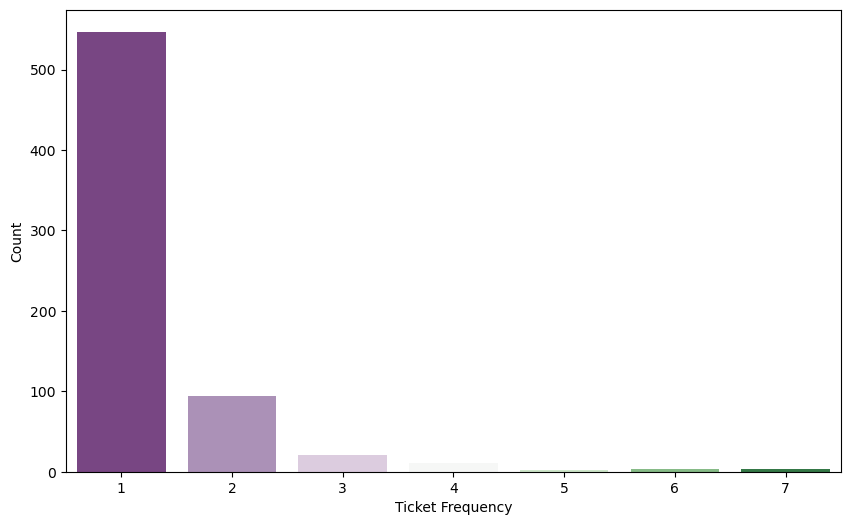

In [38]:
'''35'''
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_freq_counts.index, y=ticket_freq_counts.values, palette = 'PRGn')

plt.xlabel('Ticket Frequency')
plt.ylabel('Count')
plt.show()

In [39]:
'''36'''
ticket_frequency_train = []

for index, row in df_train.iterrows():
    ticket = row['Ticket']
    frequency = ticket_counts_train[ticket]
    ticket_frequency_train.append(frequency)

df_train['Ticket_Frequency'] = ticket_frequency_train


ticket_frequency_test = []

for index, row in df_test.iterrows():
    ticket = row['Ticket']
    frequency = ticket_counts_test[ticket]
    ticket_frequency_test.append(frequency)

df_test['Ticket_Frequency'] = ticket_frequency_test

In [40]:
'''37'''
for i in range(len(df_train)):
    if df_train['Ticket_Frequency'][i] >= 4:
        df_train['Ticket_Frequency'][i] = 3

for i in range(len(df_test)):
    if df_test['Ticket_Frequency'][i] >= 4:
        df_test['Ticket_Frequency'][i] = 3

In [41]:
'''38'''
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       891 non-null    int64   
 1   Survived          891 non-null    int64   
 2   Pclass            891 non-null    int64   
 3   Name              891 non-null    object  
 4   Age               891 non-null    category
 5   SibSp             891 non-null    int64   
 6   Parch             891 non-null    int64   
 7   Ticket            891 non-null    object  
 8   Fare              891 non-null    category
 9   Sex_female        891 non-null    uint8   
 10  Sex_male          891 non-null    uint8   
 11  Embarked_C        891 non-null    uint8   
 12  Embarked_Q        891 non-null    uint8   
 13  Embarked_S        891 non-null    uint8   
 14  FamilySize        891 non-null    int64   
 15  Ticket_Frequency  891 non-null    int64   
dtypes: category(2), int64(7), 

In [42]:
'''39'''
# 성능 확인
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'Ticket_Frequency'] 

X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

preds = model_dt.predict(X_test)

submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

submission.to_csv('Family_Ticket_score.csv', index=False)

(891, 12)
(891, 1)
(418, 12)


In [43]:
'''40'''
# 성능 확인
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Ticket_Frequency'] 

X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

preds = model_dt.predict(X_test)

submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

submission.to_csv('Ticket_score.csv', index=False)

(891, 11)
(891, 1)
(418, 11)


#### * Title 생성

In [44]:
'''41'''
# 3주차 참고
df_train['Title']=""

for i in range(len(df_train['Name'])):
    full_name = df_train['Name'][i]  # 1. 현재 행의 전체 이름

    last_name = full_name.split(',')[1]  # 2. 이름을 콤마(,)로 나눈 후 두 번째 부분
    title = last_name.split('.')[0]      # 3. 두 번째 부분을 점(.)으로 나누고 첫 번째 부분을 추출
    df_train['Title'][i] = title.lower()  # 4. 추출된 호칭을 소문자로 변환하여 'title' 열에 저장합니다.

In [45]:
'''42'''
df_train['Title'].value_counts()

 mr              517
 miss            182
 mrs             125
 master           40
 dr                7
 rev               6
 mlle              2
 major             2
 col               2
 the countess      1
 capt              1
 ms                1
 sir               1
 lady              1
 mme               1
 don               1
 jonkheer          1
Name: Title, dtype: int64

In [46]:
'''43'''
df_test['Title']=""

for i in range(len(df_test['Name'])):
    full_name = df_test['Name'][i]  # 1. 현재 행의 전체 이름

    last_name = full_name.split(',')[1]  # 2. 이름을 콤마(,)로 나눈 후 두 번째 부분
    title = last_name.split('.')[0]      # 3. 두 번째 부분을 점(.)으로 나누고 첫 번째 부분을 추출
    df_test['Title'][i] = title.lower()  # 4. 추출된 호칭을 소문자로 변환하여 'title' 열에 저장합니다.

In [47]:
'''44'''
df_test['Title'].value_counts()

 mr        240
 miss       78
 mrs        72
 master     21
 col         2
 rev         2
 ms          1
 dr          1
 dona        1
Name: Title, dtype: int64

In [48]:
'''45'''
df_train.to_csv('df_train_5.csv', index=False)
df_test.to_csv('df_test_5.csv', index=False)

<span style = "color:red"> 
Q3. Title 피쳐는 어떻게 인코딩할 수 있을까요?

In [52]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,...,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Ticket_Frequency,Title_ master,Title_ miss,Title_ mr,Title_ mrs,Title_etc
0,1,0,3,"Braund, Mr. Owen Harris",3,1,0,A/5 21171,1,0,...,0,0,1,2,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",4,1,0,PC 17599,4,1,...,1,0,0,2,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",3,0,0,STON/O2. 3101282,2,1,...,0,0,1,1,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,1,0,113803,4,1,...,0,0,1,2,2,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",3,0,0,373450,2,0,...,0,0,1,1,1,0,0,1,0,0


In [50]:
### 답
# 여기에 답을 작성하시오.

# 1. 빈도가 잦은 것을 모아 리스트로 만들어보세요.
# 2. 반복문을 돌며 리스트에 없는 것은 etc로 정의하세요.
# 3. get_dummies 활용해 문자를 숫자형태로 인코딩해보세요.

# 1
common_titles = [' mr',' miss',' mrs',' master']

# 2
for i in range(len(df_train)):
    if df_train.loc[ i ,'Title' ] not in common_titles:
        df_train.loc[ i, 'Title' ] = 'etc'

for i in range(len(df_test) ):
    if df_test.loc[ i ,'Title' ] not in common_titles:
        df_test.loc[ i, 'Title' ] = 'etc'
# 3
df_train = pd.get_dummies(df_train, columns=['Title'])
df_test = pd.get_dummies(df_test, columns=['Title'])

<span style = "color:red"> 
Q4. 지금까지 나온 피쳐를 조합해서 성능을 높여보세요. (피쳐를 자유롭게 선택해 넣어보세요.)

In [51]:
### 답
col = [] 

<span style = "color:red"> 
모델에 넣을 피쳐를 col 리스트에 넣고, 성능을 확인해보세요.

In [ ]:
X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

preds = model_dt.predict(X_test)

submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

submission.to_csv('Ticket_score.csv', index=False)